In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("INFLUD21-29-11-2021.csv", sep=";")
df.head()

C:\Users\Gabriel Vasconcelos\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,18,60,62,63,64,92,94,106,108,115,117,118,119,123,144) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,RES_IGM,RES_IGA,ESTRANG,VACINA_COV,DOSE_1_COV,DOSE_2_COV,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,05/01/2021,1,03/01/2021,1,PR,09RS FOZ DO IGUACU,1363.0,MATELANDIA,411560,HOSPITAL E MATERNIDADE PADRE TEZZA,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0
1,07/01/2021,1,04/01/2021,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSP STA CRUZ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/01/2021,1,05/01/2021,1,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL DAS CLINICAS DA UNICAMP DE CAMPINAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/01/2021,2,09/01/2021,1,PR,02RS METROPOLITANA,1356.0,CURITIBA,410690,COMPLEXO HOSPITAL DE CLINICAS,...,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0
4,09/01/2021,1,07/01/2021,1,SP,GVE VIII MOGI DAS CRUZES,1333.0,ITAQUAQUECETUBA,352310,HOSPITAL GERAL DE ITAQUAQUECETUBA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1625471, 162)

In [4]:
print(df.isnull().sum())

DT_NOTIFIC          0
SEM_NOT             0
DT_SIN_PRI          0
SEM_PRI             0
SG_UF_NOT           0
               ...   
DOSE_2_COV    1465349
LAB_PR_COV    1352907
LOTE_1_COV    1433877
LOTE_2_COV    1502539
FNT_IN_COV     516581
Length: 162, dtype: int64


### Criando novo df filtrado

#### Novo df com pacientes que apresentaram sintomas, vacinados ou não, internados ou não e se sobreviveram

In [5]:
novoDf = df[['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'DOR_ABD', 'FADIGA', 'PERD_OLFT', 'PERD_PALA', 'VACINA_COV', 'HOSPITAL', 'EVOLUCAO']]
novoDf.head()

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,HOSPITAL,EVOLUCAO
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
1,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0
2,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0
3,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0


#### Analisando value counts de cada coluna

In [6]:
for c in range(len(novoDf.columns)):
    print(novoDf[novoDf.columns[c]].value_counts())
    print("\n")

1.0    842760
2.0    466474
9.0     19919
Name: FEBRE, dtype: int64


1.0    1083235
2.0     300860
9.0      15983
Name: TOSSE, dtype: int64


2.0    825237
1.0    258591
9.0     31842
Name: GARGANTA, dtype: int64


1.0    1127595
2.0     272106
9.0      13863
Name: DISPNEIA, dtype: int64


1.0    887548
2.0    390896
9.0     18411
Name: DESC_RESP, dtype: int64


1.0    1028221
2.0     309210
9.0      18748
Name: SATURACAO, dtype: int64


2.0    871557
1.0    195951
9.0     29612
Name: DIARREIA, dtype: int64


2.0    909411
1.0    139294
9.0     30557
Name: VOMITO, dtype: int64


2.0    922984
1.0     98783
9.0     36600
Name: DOR_ABD, dtype: int64


2.0    694980
1.0    400184
9.0     32908
Name: FADIGA, dtype: int64


2.0    895216
1.0    134402
9.0     42488
Name: PERD_OLFT, dtype: int64


2.0    891532
1.0    136952
9.0     43116
Name: PERD_PALA, dtype: int64


2.0    531033
1.0    310068
9.0    267570
Name: VACINA_COV, dtype: int64


1.0    1546732
2.0      27709
9.0       2962
Na

#### pegando dados somente com entradas 1 e 2 em ambas as colunas

In [7]:
dadosML = novoDf[(novoDf['FEBRE']!=9) & (novoDf['TOSSE']!=9) & (novoDf['GARGANTA']!=9) & (novoDf['DISPNEIA']!=9) & (novoDf['DESC_RESP']!=9) & (novoDf['SATURACAO']!=9) & (novoDf['DIARREIA']!=9) & (novoDf['VOMITO']!=9) & (novoDf['DOR_ABD']!=9) & (novoDf['FADIGA']!=9) & (novoDf['PERD_OLFT']!=9) & (novoDf['PERD_PALA']!=9) & (novoDf['VACINA_COV']!=9) & (novoDf['HOSPITAL']!=9) & (novoDf['EVOLUCAO']!=9) & (novoDf['EVOLUCAO']!=3)]
dadosML.head()

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,HOSPITAL,EVOLUCAO
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
1,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0
2,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0
3,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0


In [8]:
dadosML.shape

(1267231, 15)

In [9]:
dadosML.dropna()
dadosML.head()

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,HOSPITAL,EVOLUCAO
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
1,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0
2,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN,1.0,1.0
3,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
4,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0


In [10]:
dadosML.shape

(1267231, 15)

In [11]:
print(dadosML.isnull().sum())

FEBRE         238115
TOSSE         180182
GARGANTA      410551
DISPNEIA      172349
DESC_RESP     265532
SATURACAO     217446
DIARREIA      426725
VOMITO        441560
DOR_ABD       458927
FADIGA        400869
PERD_OLFT     446999
PERD_PALA     447284
VACINA_COV    480158
HOSPITAL       41392
EVOLUCAO      192543
dtype: int64


In [12]:
dados = dadosML.dropna()
dados.head()

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,VACINA_COV,HOSPITAL,EVOLUCAO
0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
10,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0
15,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
18,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
26,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0


In [13]:
dados.shape

(477244, 15)

In [14]:
print(dados.isnull().sum())

FEBRE         0
TOSSE         0
GARGANTA      0
DISPNEIA      0
DESC_RESP     0
SATURACAO     0
DIARREIA      0
VOMITO        0
DOR_ABD       0
FADIGA        0
PERD_OLFT     0
PERD_PALA     0
VACINA_COV    0
HOSPITAL      0
EVOLUCAO      0
dtype: int64


In [15]:
for c in range(len(dados.columns)):
    print(dados[dados.columns[c]].value_counts())
    print("\n")

1.0    258736
2.0    218508
Name: FEBRE, dtype: int64


1.0    341876
2.0    135368
Name: TOSSE, dtype: int64


2.0    387070
1.0     90174
Name: GARGANTA, dtype: int64


1.0    353622
2.0    123622
Name: DISPNEIA, dtype: int64


1.0    294809
2.0    182435
Name: DESC_RESP, dtype: int64


1.0    341136
2.0    136108
Name: SATURACAO, dtype: int64


2.0    407929
1.0     69315
Name: DIARREIA, dtype: int64


2.0    427629
1.0     49615
Name: VOMITO, dtype: int64


2.0    438973
1.0     38271
Name: DOR_ABD, dtype: int64


2.0    321027
1.0    156217
Name: FADIGA, dtype: int64


2.0    426770
1.0     50474
Name: PERD_OLFT, dtype: int64


2.0    425178
1.0     52066
Name: PERD_PALA, dtype: int64


2.0    317687
1.0    159557
Name: VACINA_COV, dtype: int64


1.0    468873
2.0      8371
Name: HOSPITAL, dtype: int64


1.0    340559
2.0    136685
Name: EVOLUCAO, dtype: int64




#### Analisando correlação

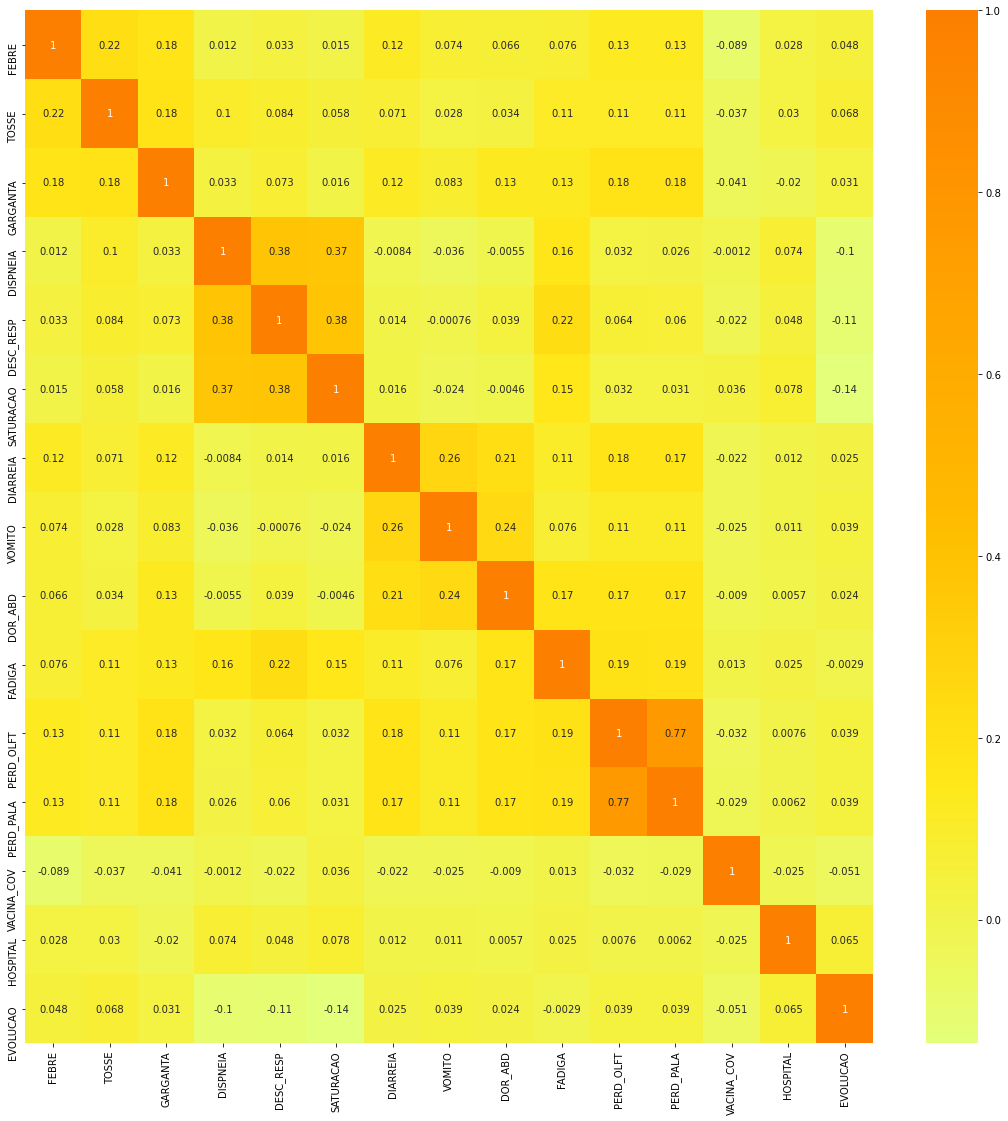

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(19, 19))
sns.heatmap(dados.corr(), cmap ='Wistia', annot =True)
plt.show()

#### separando dados

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [18]:
x = dados.drop('EVOLUCAO', axis=1)
y = dados['EVOLUCAO']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [19]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

381795
95449
381795
95449


#### Treinando o modelo

In [20]:
classificador = SVC(kernel='rbf')
classificador.fit(x_train, y_train)

SVC()

#### Analisando previsões

In [21]:
previsoes = classificador.predict(x_test)
previsoes

array([1., 1., 1., ..., 1., 1., 1.])

#### Analisando métricas

C:\Users\Gabriel Vasconcelos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


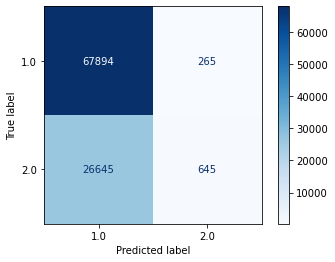

<Figure size 864x864 with 0 Axes>

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classificador, x_test, y_test, cmap=plt.cm.Blues)  
plt.figure(figsize = (12, 12))
plt.show()

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

         1.0       0.72      1.00      0.83     68159
         2.0       0.71      0.02      0.05     27290

    accuracy                           0.72     95449
   macro avg       0.71      0.51      0.44     95449
weighted avg       0.72      0.72      0.61     95449

